In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
ds = pd.read_csv('HR_comma_sep.csv')
ds.head()
ds.dropna()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [18]:
newds = ds.drop(columns = {'Department','salary'})

In [19]:
newds.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [ ]:
# satisfaction_level, Work_accident, and  promotion_last_5years may be used as independent variable to predict whether the employee may left the company 
# or not

<Axes: xlabel='salary'>

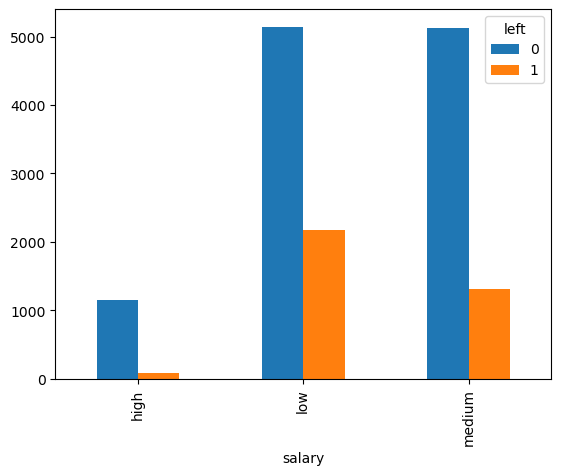

In [5]:
pd.crosstab(ds.salary,ds.left).plot( kind = 'bar')

In [ ]:
# this shows that employee with higher salary have more probability not to leave the company 

<Axes: xlabel='Department'>

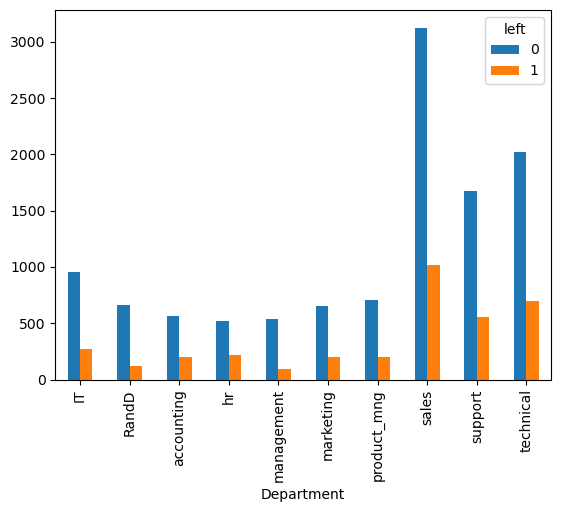

In [20]:
pd.crosstab(ds.Department,ds.left).plot( kind = 'bar')

In [56]:
x = ds.drop(columns = {'last_evaluation','number_project','average_montly_hours','time_spend_company','left','Department'})
x

,satisfaction_level,Work_accident,promotion_last_5years,salary
0,0.38,0,0,low
1,0.80,0,0,medium
2,0.11,0,0,medium
3,0.72,0,0,low
4,0.37,0,0,low
...,...,...,...,...
14994,0.40,0,0,low
14995,0.37,0,0,low
14996,0.37,0,0,low
14997,0.11,0,0,low


In [57]:
dummaySalary = pd.get_dummies(ds.salary)
dummaySalary

,high,low,medium
0,False,True,False
1,False,False,True
2,False,False,True
3,False,True,False
4,False,True,False
...,...,...,...
14994,False,True,False
14995,False,True,False
14996,False,True,False
14997,False,True,False


In [58]:
newX = pd.concat([x,dummaySalary],axis = 'columns')
newX

,satisfaction_level,Work_accident,promotion_last_5years,salary,high,low,medium
0,0.38,0,0,low,False,True,False
1,0.80,0,0,medium,False,False,True
2,0.11,0,0,medium,False,False,True
3,0.72,0,0,low,False,True,False
4,0.37,0,0,low,False,True,False
...,...,...,...,...,...,...,...
14994,0.40,0,0,low,False,True,False
14995,0.37,0,0,low,False,True,False
14996,0.37,0,0,low,False,True,False
14997,0.11,0,0,low,False,True,False


In [59]:
newX = newX.drop(columns = {'salary'})
newX.head()

,satisfaction_level,Work_accident,promotion_last_5years,high,low,medium
0,0.38,0,0,False,True,False
1,0.80,0,0,False,False,True
2,0.11,0,0,False,False,True
3,0.72,0,0,False,True,False
4,0.37,0,0,False,True,False


In [60]:
y = ds.left
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [61]:
X_train, X_test, y_train, y_test = train_test_split(newX,y)

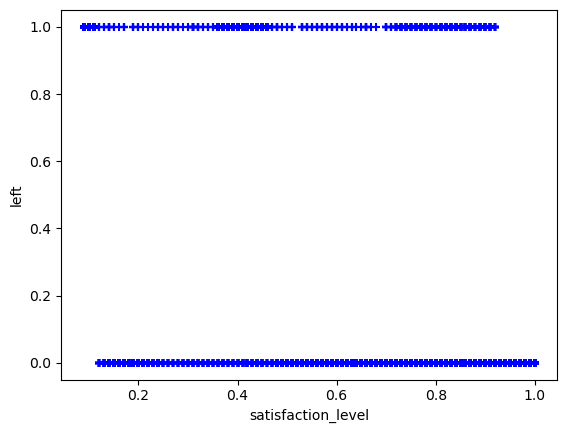

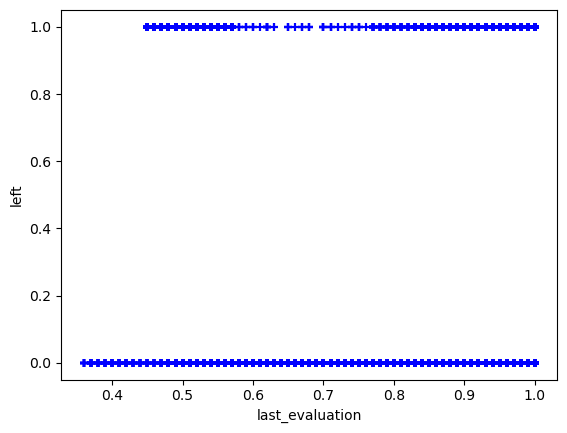

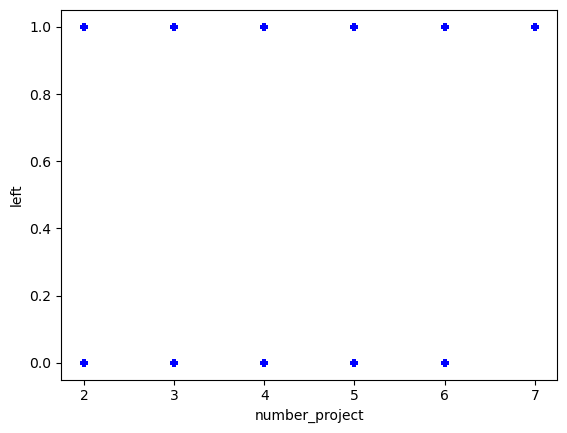

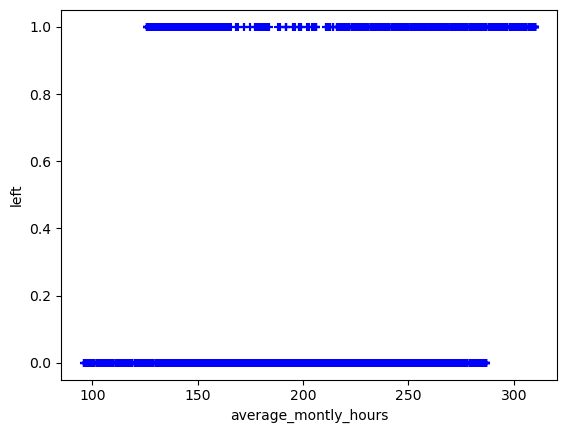

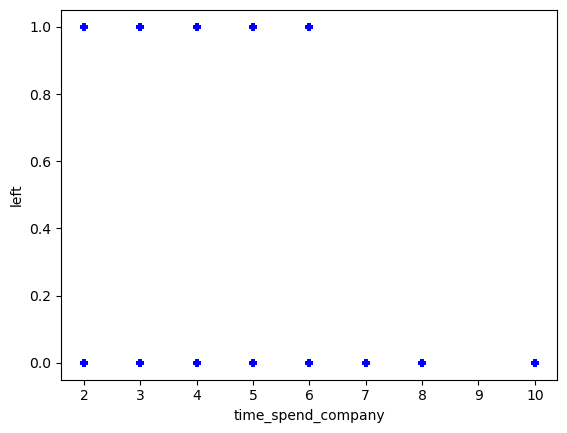

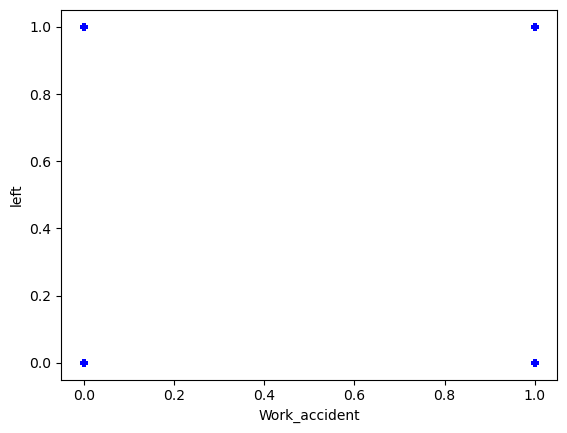

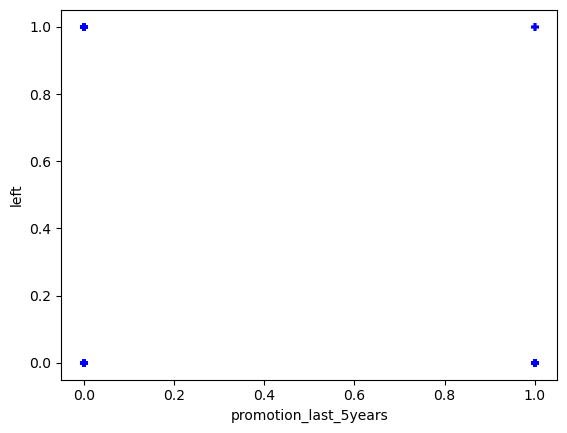

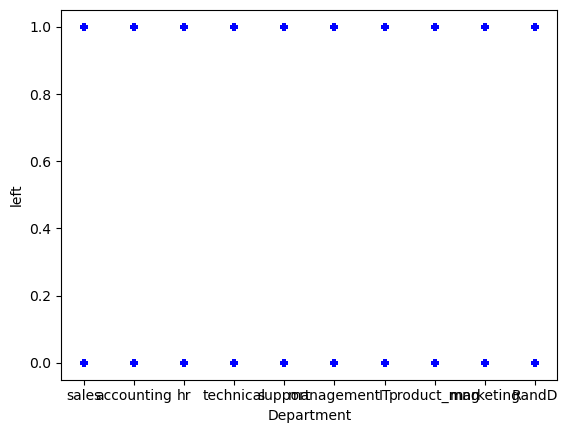

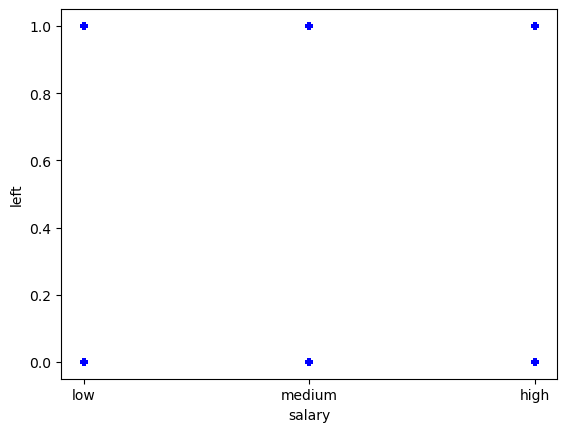

In [62]:
%matplotlib inline
for i in range(len(ds.columns)):
    if(ds.columns[i] == 'left'):
        continue
    mpl.xlabel(ds.columns[i])
    mpl.ylabel('left')
    mpl.show(mpl.scatter(ds[ds.columns[i]],ds.left,color = 'blue', marker = '+'))

In [63]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [64]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
model.score(X_test,y_test)

0.7816